In [13]:
#imports
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt


# load data into data frame
dfraw = pd.read_csv("speedHumpData.csv")


#creates new data frame for neighborhood and number of speedhumps
d = {'Neighborhood': [], 'Speedhumps': []}
df = pd.DataFrame(data=d)


#finds each unique speed hump's neighborhood and adds it to data frame
for element in dfraw["neighborhood"].unique():
    df=df.append(pd.DataFrame([[element, dfraw['neighborhood'].value_counts()[element]]], columns=["Neighborhood", "Speedhumps"]))
    
    
#outputs
df




,Neighborhood,Speedhumps
0,Squirrel Hill South,18.0
0,North Oakland,6.0
0,Brookline,4.0
0,Bloomfield,3.0
0,Polish Hill,6.0
0,Homewood South,4.0
0,Mount Washington,3.0
0,South Side Flats,3.0
0,Central Oakland,1.0
0,Squirrel Hill North,3.0


# Map Visualization

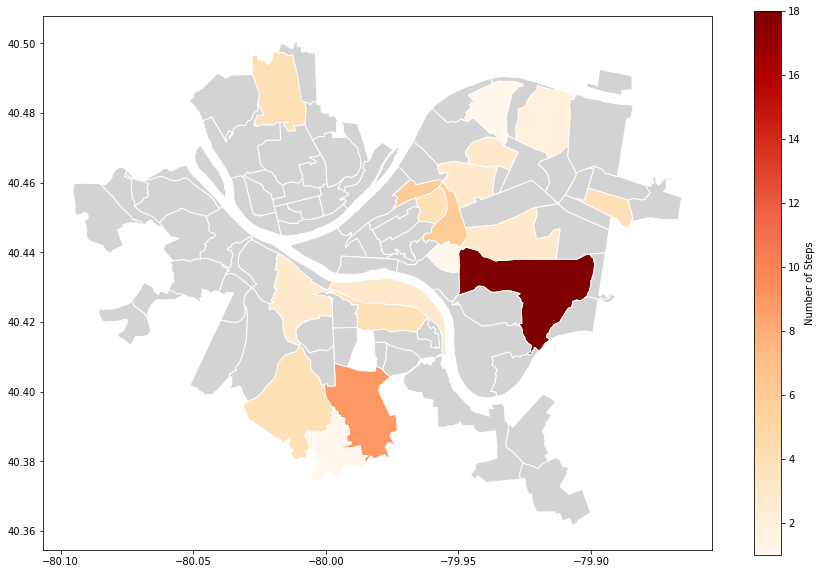

In [14]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile


# merges shape file and data frame
map2 = neighborhoods.merge(df, how='left', left_on='hood', right_on='Neighborhood')


# draw a choropleth map using data 
map2.plot(column='Speedhumps', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )


    

